# TRABAJO DE TÉCNICAS SUPERVISADAS 

#### Dataset: Red Wine Quality
#### Por: Maicol Llano Moncada

In [41]:
# Importar librerias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import warnings; warnings.simplefilter('ignore')

# Problema a resolver con los datos
Predecir el valor de calidad de un vino con base en una serie de atributos y características

# 1. Cargar Datos

In [42]:
df = pd.read_csv('Calidad_Vino.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


## Informacion de la tabla

-  Fixed Acidity (g/L)
-  Volatile Acidity (g/L)
-  Citric Acid (g/L)
-  Residual Sugar (g/L)
-  Chlorides (g/L)
-  Free Sulfur Dioxide (mg/L)
-  Total Sulfur Dioxide (mg/L)
-  Density  (g/mL)
-  pH
-  Sulphates (g/L)
-  Alcohol (vol %)

DATOS DE SALIDA:

-  Quality (0-10)

# 2. Descripcion de datos

In [43]:
#Tipos de variables

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [44]:
#tamaño del dataframe
df.shape

(1785, 12)

In [45]:
print('Numero de instancias = {}'.format(len(df)))

Numero de instancias = 1785


In [46]:
# Realizar un analisis estadistico de las variables numericas

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1769.000000,1769.000000,1769.000000,1769.000000,1785.000000,1784.000000,1773.000000,1768.000000,1767.000000,1766.000000,1769.000000,1757.000000
mean,8.293951,88.041447,0.271747,2.533550,57.020561,16.011771,46.287084,50.584000,3.313237,0.656133,10.409855,5.626636
std,1.784864,238.000328,0.194148,1.375419,55.139796,10.436539,32.717792,216.723892,0.154152,0.166146,1.054853,0.801150
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,0.090000,8.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.800000,0.530000,0.260000,2.200000,68.000000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.660000,0.430000,2.600000,83.000000,22.000000,62.000000,0.998155,3.405000,0.730000,11.066667,6.000000
max,15.900000,1185.000000,1.000000,15.500000,611.000000,72.000000,289.000000,1001.000000,4.010000,2.000000,14.900000,8.000000


# 3. Datos duplicados y faltantes


In [47]:
#Cantidad de datos duplicados

df[df.duplicated()==True].shape


(371, 12)

In [48]:
#Se eliminan los datos duplicados
df.drop_duplicates(inplace=True)
df.shape

(1414, 12)

In [49]:
#Se verifica cuáles variables tienen valores faltantes

df.isnull().sum()[df.isnull().sum()>0]

fixed acidity           16
volatile acidity        16
citric acid             16
residual sugar          16
free sulfur dioxide      1
total sulfur dioxide    12
density                 17
pH                      18
sulphates               19
alcohol                 15
quality                 27
dtype: int64

In [50]:
#Se verifican todas las instancias que tienen más del 33.33% de los datos faltantes (3 datos en adelante)

missing=df.isnull().sum(axis=1)[df.isnull().sum(axis=1)>3]

missing

1544    4
1545    4
1546    5
1547    5
1548    8
1549    9
1550    4
1551    4
1552    5
1553    4
1554    5
1572    4
1576    8
1577    9
1578    7
1579    6
1580    4
1581    4
1582    4
1583    4
1584    5
1585    5
1586    6
dtype: int64

In [51]:
#Se eliminan todas las instancias que tienen más del 33.33% de los datos faltantes (3 datos en adelante)
df.drop(missing.index.values,inplace=True)

df.shape

(1391, 12)

In [52]:
df.isnull().sum()[df.isnull().sum()>0]

fixed acidity            7
volatile acidity         5
citric acid              5
residual sugar           5
free sulfur dioxide      1
total sulfur dioxide     1
pH                       1
sulphates                2
alcohol                  5
quality                 18
dtype: int64

In [53]:
# Se observa que aún existen muchos valores faltantes para la variable quality. Se toma la decisión de eliminar todas
# las instancias en las que falte esta variable, para no afectar el proceso de aplicación de las técnicas supervisadas

missingqual=df[(df['quality'].isnull())]

df.drop(missingqual.index.values,inplace=True)

df.shape

(1373, 12)

In [54]:
proof=df.isnull().sum()[df.isnull().sum()>0].index.values

df.isnull().sum()[df.isnull().sum()>0].index.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'sulphates', 'alcohol'], dtype=object)

In [55]:
df.isnull().sum()[df.isnull().sum()>0]

fixed acidity       7
volatile acidity    4
citric acid         5
residual sugar      5
sulphates           2
alcohol             1
dtype: int64

# 4. Visualización de los datos

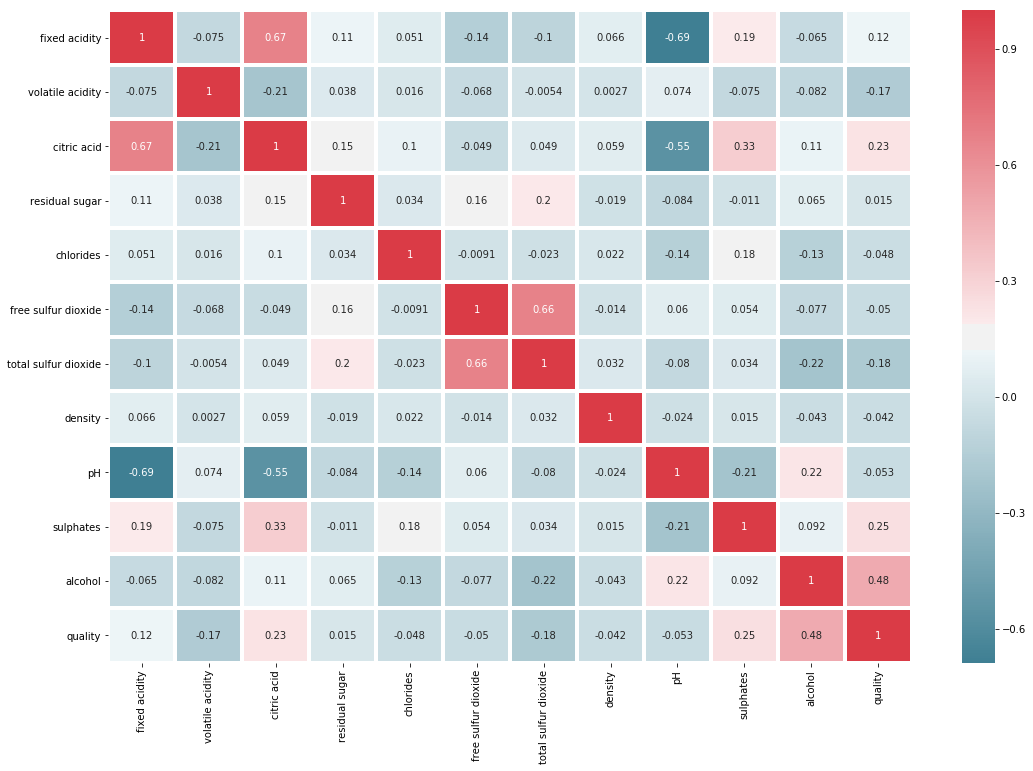

In [56]:
plt.figure(figsize=(18,12))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().index.values,cmap=cmap,linewidths=3,annot=True);

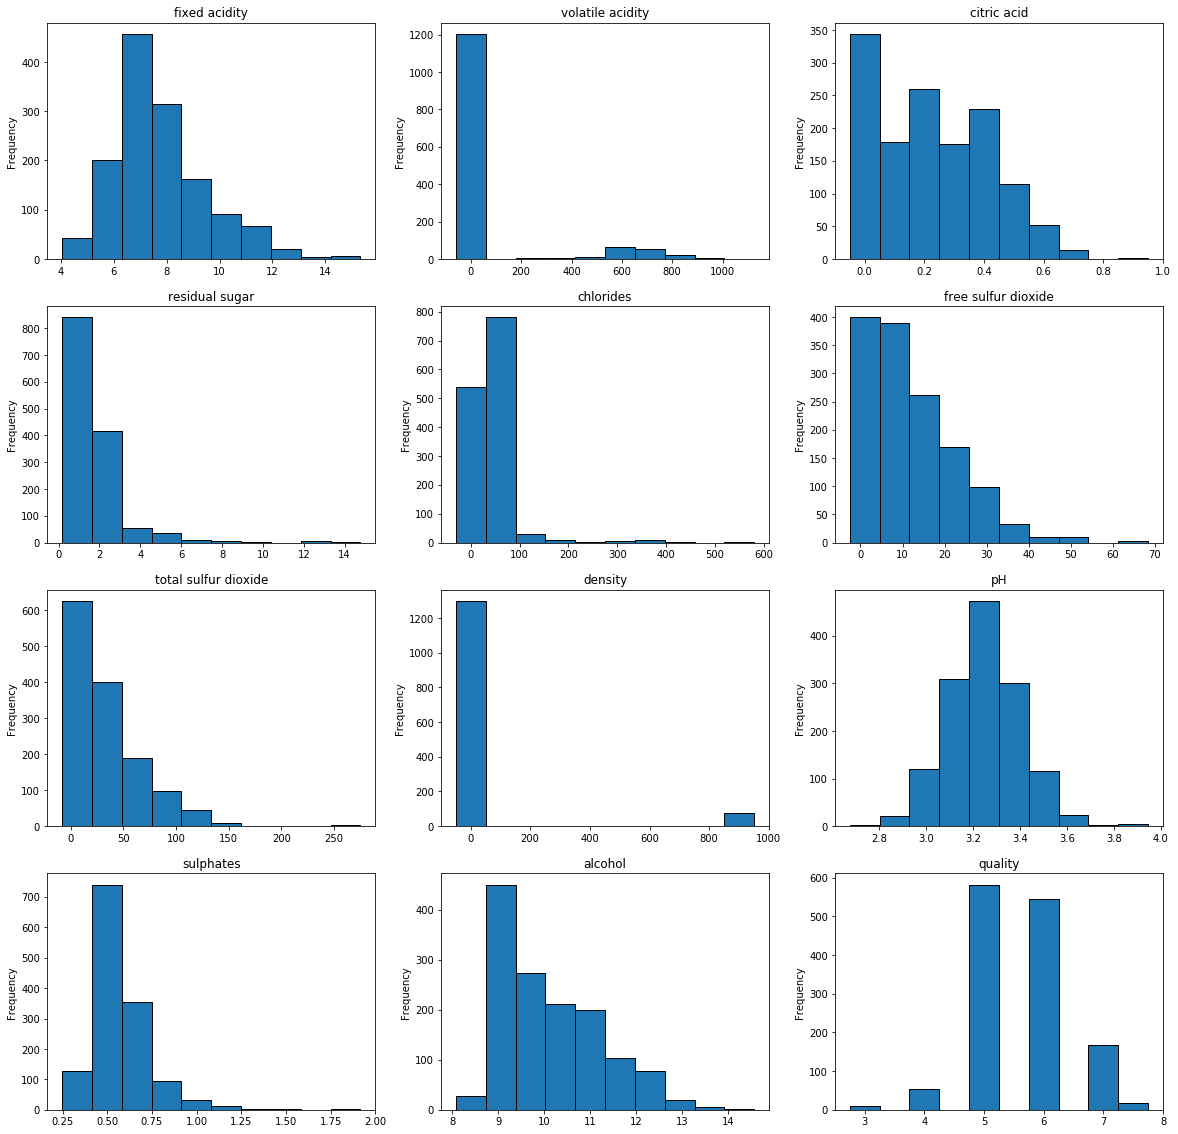

In [57]:
d=df.dtypes.index.values

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20));
contador=0;
for x in range(4):
    for y in range(3):
        df[d[contador]].plot.hist(align='left',ec='black',ax=axes[x,y]);
        axes[x,y].set_title(d[contador])
        contador+=1
        if contador==12: break


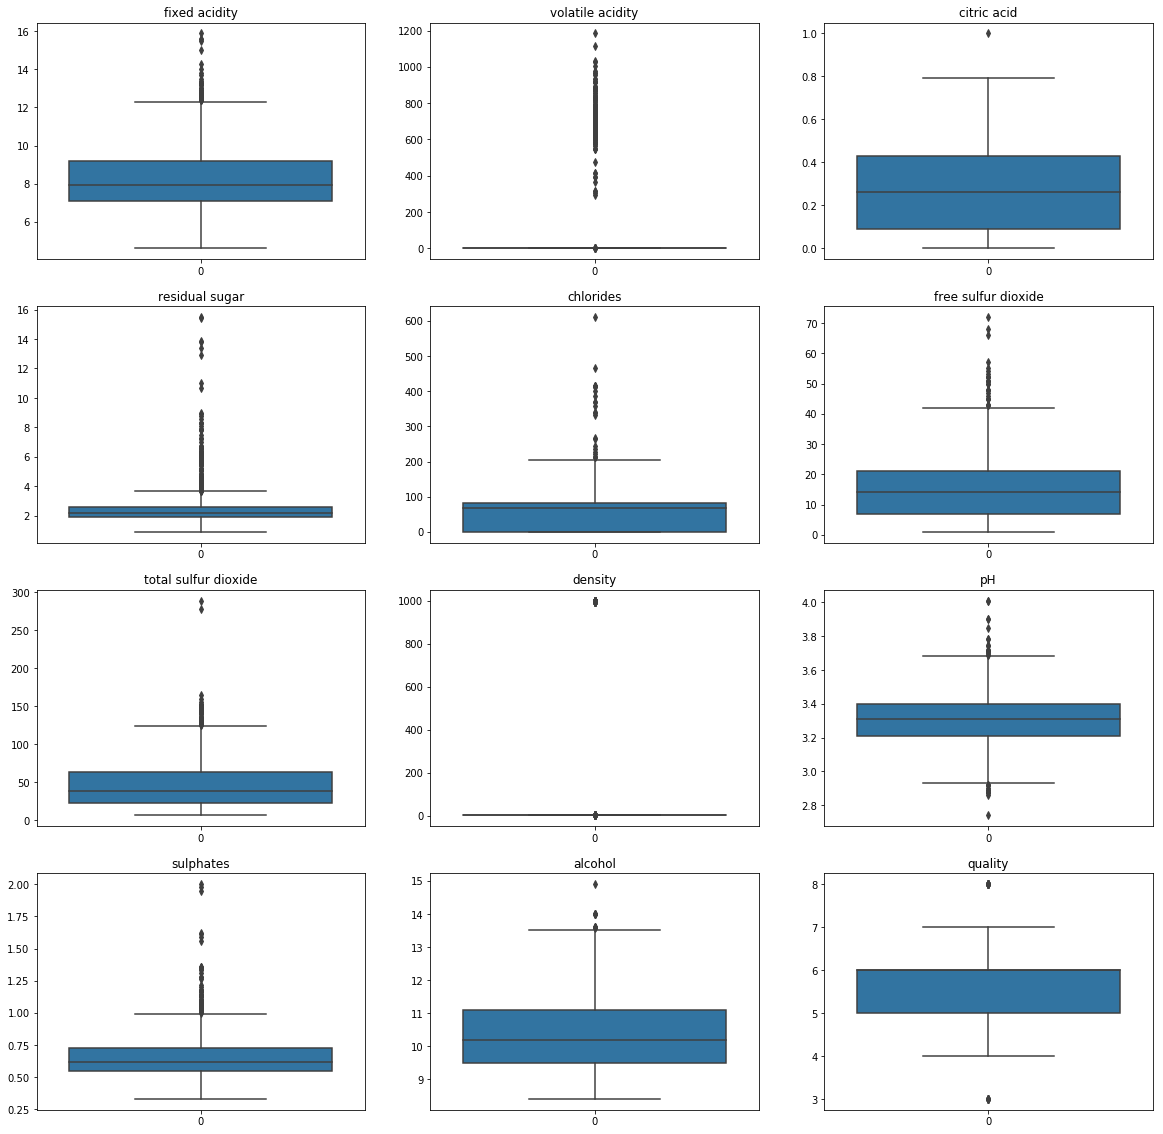

In [58]:
d=df.dtypes.index.values
fig, axes=plt.subplots(nrows=4, ncols=3, figsize=(20,20));
contador=0;
for x in range(4):
    for y in range(3):
        sns.boxplot(data=df[d[contador]],ax=axes[x,y])
        axes[x,y].set_title(d[contador])
        contador+=1
        if contador==12: break

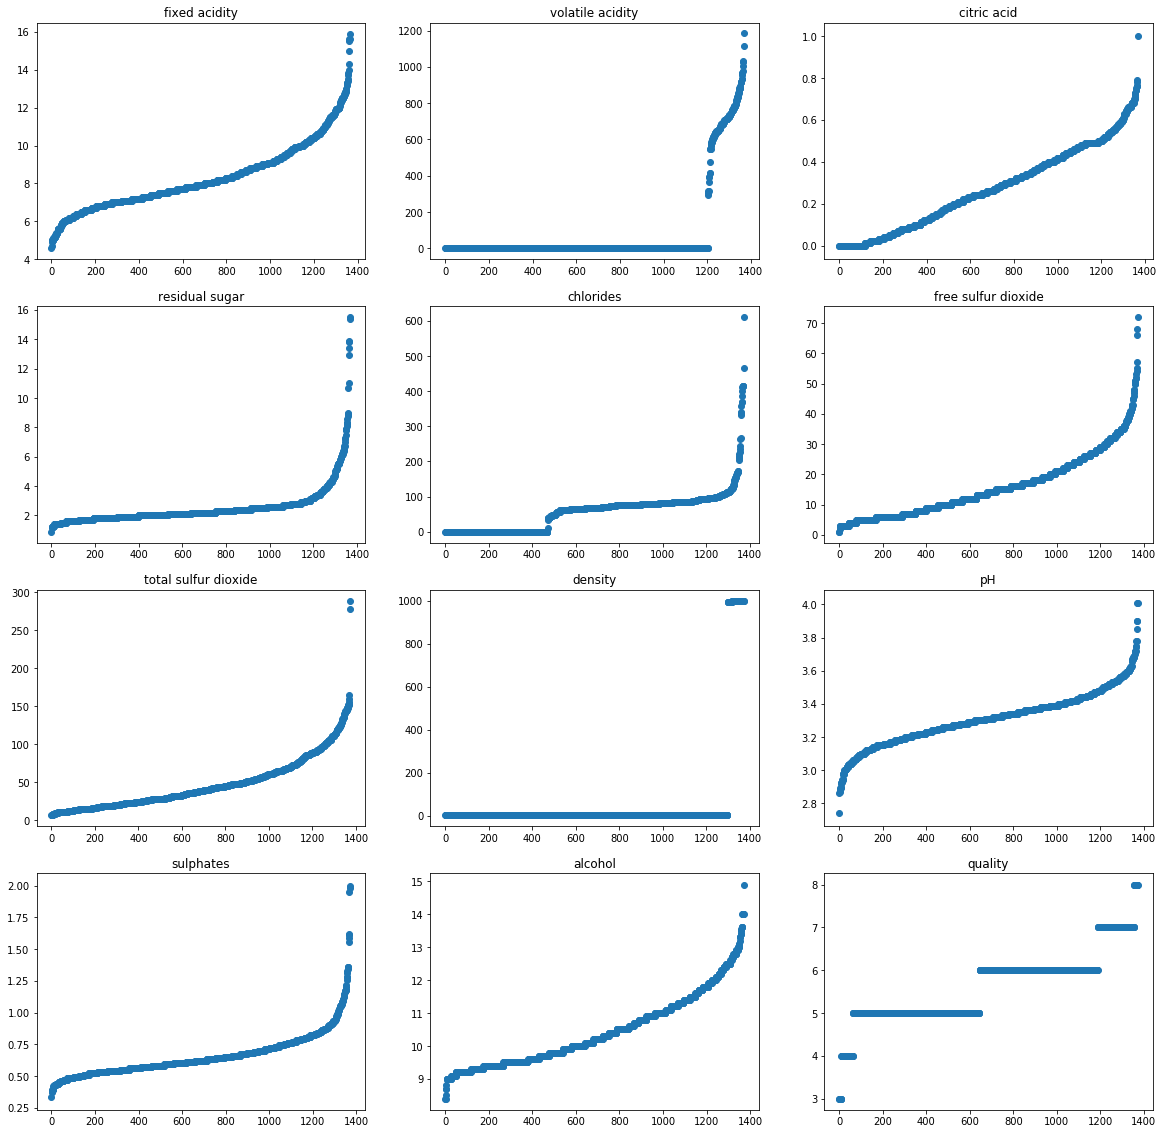

In [59]:
d=df.dtypes.index.values

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20));
contador=0;
for x in range(4):
   
    for y in range(3):
        sorted = df.sort_values(d[contador],ascending=True)
        ones = []
        for i in range(len(sorted[d[contador]])):
            ones.append(i)

        axes[x,y].scatter(ones,sorted[d[contador]])
        axes[x,y].set_title(d[contador]);
        contador+=1
        if contador==12: break
            


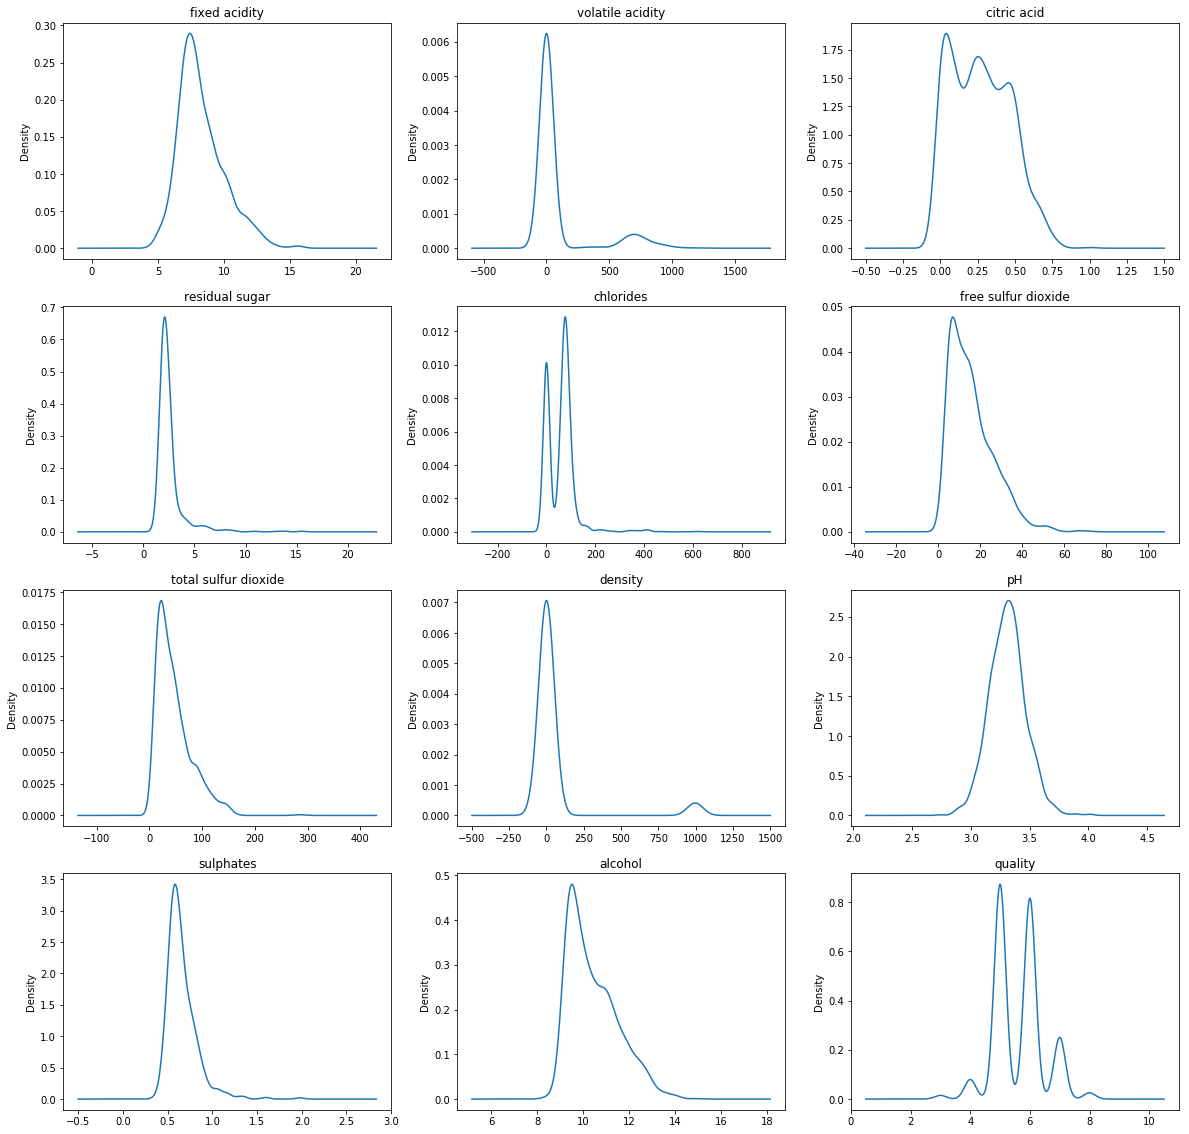

In [60]:
d=df.dtypes.index.values

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20));
contador=0;
for x in range(4):
   
    for y in range(3):
        df[d[contador]].plot.kde(ax=axes[x,y]);
        axes[x,y].set_title(d[contador]);
        contador+=1
        if contador==12: break
            

# 5. Manejo de Outliers y datos fuera de escala


## 5.1 Fixed Acidity

12.349999999999998


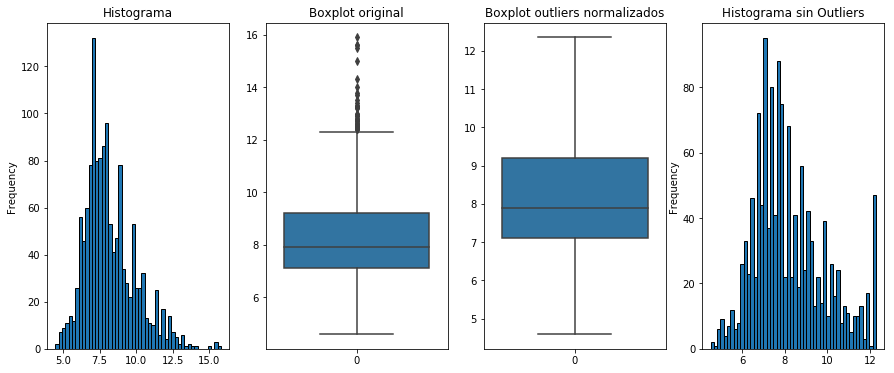

In [61]:
# Los valores comunes para fixed acidity en los vinos se encuentran entre 1 - 8 g/L
#En esta variable se observa que existen valores extraños por encima de 12 g/L
#Se toma lA decisión de igualarlos al MAX

fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
df['fixed acidity'].plot.hist(align='left',ec='black', bins=50, ax=axes[0]);
sns.boxplot(data=df['fixed acidity'],ax=axes[1]);
Q1=df['fixed acidity'].quantile(0.25);Q3=df['fixed acidity'].quantile(0.75);IQR=Q3-Q1;MAX=Q3+1.5*IQR #Calculos de cuantiles y el máximo 
print(MAX)
outacidity=df['fixed acidity'][df['fixed acidity']>MAX].index.values #Almaceno aquellas instancias que tengan valores mayores al máximo del boxplot

for x in range(len(outacidity)):
    df.at[outacidity[x],'fixed acidity']=MAX #Reemplazo los valores extraños por el máximo
    
sns.boxplot(data=df['fixed acidity'],ax=axes[2]); #Grafico nuevamente el boxplot para comprobar que ya no hay valores atipicos.
df['fixed acidity'].plot.hist(align='left',ec='black', bins=50, ax=axes[3]);

axes[0].set_title("Histograma");
axes[1].set_title("Boxplot original");
axes[2].set_title("Boxplot outliers normalizados");
axes[3].set_title("Histograma sin Outliers");


## 5.2 Volatile Acidity

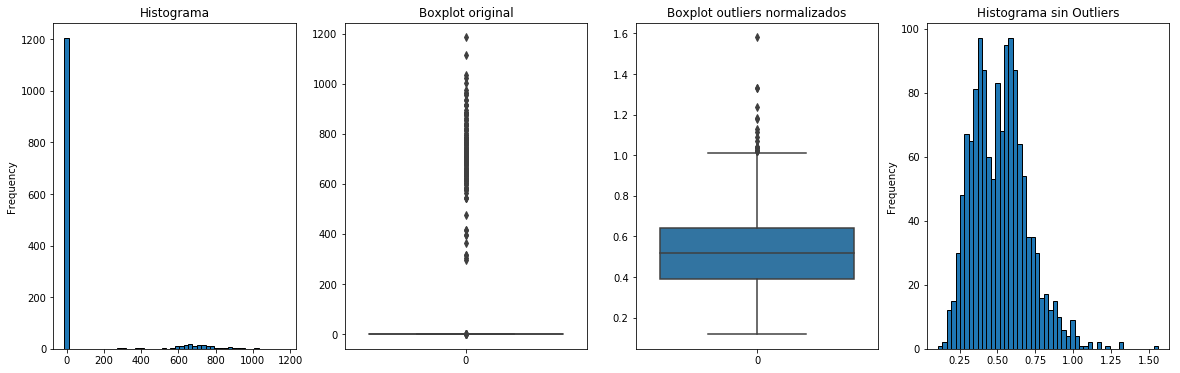

In [62]:
# The aroma threshold for acetic acid in red wine varies from 0.6 g/L and 0.8 g/L
# Esta variable tiene muchos valores por encima de 1 
# Se toma la decisión de dividir estos valores por 1000 para que queden en la escala normal

#U.S. legal limits of Volatile Acidity: 
#Red Table Wine 1.2 g/L
#White Table Wine 1.1 g/L

fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
df['volatile acidity'].plot.hist(align='left',ec='black', bins=50, ax=axes[0]);
sns.boxplot(data=df['volatile acidity'],ax=axes[1]);

outacidity=df['volatile acidity'][df['volatile acidity']>100].index.values

for x in range(len(outacidity)):
    df.at[outacidity[x],'volatile acidity']=df.loc[outacidity[x],'volatile acidity']/1000
    

    
sns.boxplot(data=df['volatile acidity'],ax=axes[2]); #Grafico nuevamente el boxplot para comprobar que ya no hay valores atipicos.
df['volatile acidity'].plot.hist(align='left',ec='black', bins=50, ax=axes[3]);

axes[0].set_title("Histograma");
axes[1].set_title("Boxplot original");
axes[2].set_title("Boxplot outliers normalizados");
axes[3].set_title("Histograma sin Outliers");


[ 126  127  672 1299]


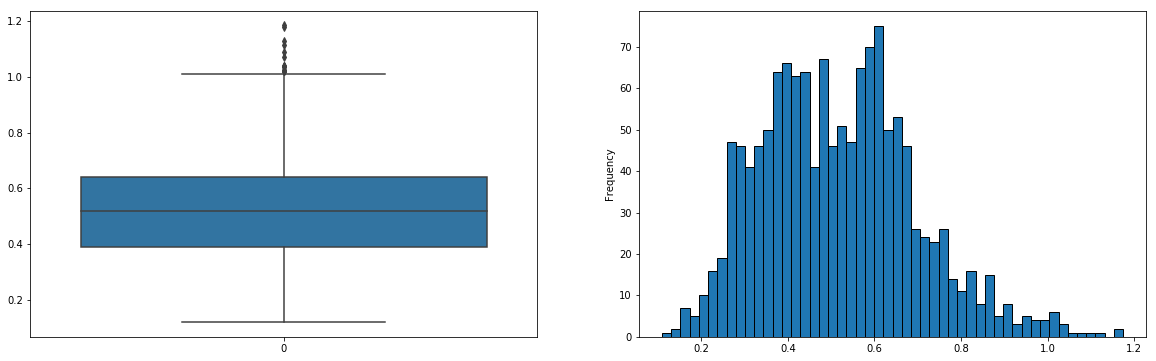

In [63]:
#Se toma la decisión de eliminar los valores que están por encima de 1.2, teniendo en cuenta los valores comunes para esta
#variable

outacidity=df['volatile acidity'][df['volatile acidity']>1.2].index.values
print(outacidity)

df.drop(outacidity,inplace=True)
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.boxplot(data=df['volatile acidity'],ax=axes[0]);
df['volatile acidity'].plot.hist(align='left',ec='black', bins=50, ax=axes[1]);

## 5.3 Citric Acid

0.92875


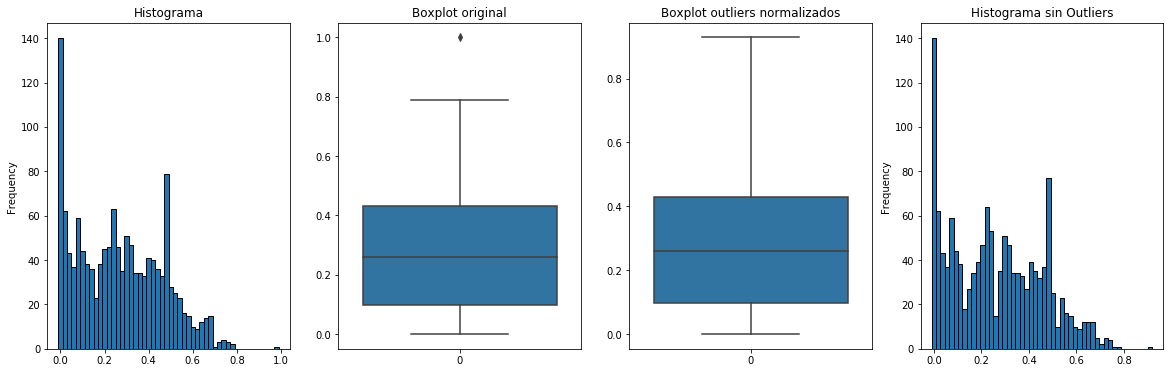

In [64]:

#Se toma la decisión de igualar los valores extraños al MAX

fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
df['citric acid'].plot.hist(align='left',ec='black', bins=50, ax=axes[0]);
sns.boxplot(data=df['citric acid'],ax=axes[1]);
Q1=df['citric acid'].quantile(0.25);Q3=df['citric acid'].quantile(0.75);IQR=Q3-Q1;MAX=Q3+1.5*IQR #Calculos de cuantiles y el máximo 
print(MAX)
outacidity=df['citric acid'][df['citric acid']>MAX].index.values #Almaceno aquellas instancias que tengan valores mayores al máximo del boxplot

for x in range(len(outacidity)):
    df.at[outacidity[x],'citric acid']=MAX #Reemplazo los valores extraños por el máximo
    
sns.boxplot(data=df['citric acid'],ax=axes[2]); #Grafico nuevamente el boxplot para comprobar que ya no hay valores atipicos.
df['citric acid'].plot.hist(align='left',ec='black', bins=50, ax=axes[3]);

axes[0].set_title("Histograma");
axes[1].set_title("Boxplot original");
axes[2].set_title("Boxplot outliers normalizados");
axes[3].set_title("Histograma sin Outliers");

## 5.4 Residual Sugar



De acuerdo con la escala de valores comunes (1-220 g/L), esta variable no presenta valores extraños

https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=imgres&cd=&cad=rja&uact=8&ved=2ahUKEwjA_4Di2IbeAhWQuVkKHSt2CokQjRx6BAgBEAU&url=https%3A%2F%2Fwinefolly.com%2Freview%2Fsugar-in-wine-chart%2F&psig=AOvVaw3ciMpBPCLJDiTu1zyCJVQl&ust=1539632664503813

## 5.5 Chlorides

The Brazilian Law, through Ordinance NO. 229, October 25th, 1988, issued by Ministério da Agricultura, Pecuária e Abastecimento [Ministry of Agriculture, Livestock and Supply] (MAPA), establishes the maximum concentration of chlorides in wine at 0.20 g L–1, expressed in sodium chloride (Brasil, 1988). However, such limits vary from country to country; for example, in Australia the maximum level of chloride allowed is 607 mg L–1, (1000 mg L–1 (1 g L–1), expressed as sodium chloride (Walker et al., 2010b).

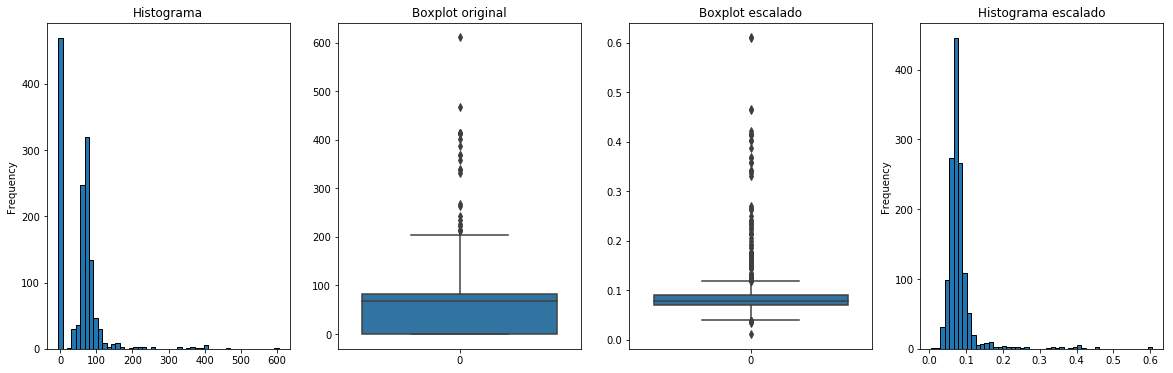

In [65]:
# Se toma la decisión de escalar los datos para que encajen en los valores normales del vino

fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
df['chlorides'].plot.hist(align='left',ec='black', bins=50, ax=axes[0]);
sns.boxplot(data=df['chlorides'],ax=axes[1]);

outacidity=df['chlorides'][df['chlorides']>1].index.values

for x in range(len(outacidity)):
    df.at[outacidity[x],'chlorides']=df.loc[outacidity[x],'chlorides']/1000
    

    
sns.boxplot(data=df['chlorides'],ax=axes[2]); 
df['chlorides'].plot.hist(align='left',ec='black', bins=50, ax=axes[3]);

axes[0].set_title("Histograma");
axes[1].set_title("Boxplot original");
axes[2].set_title("Boxplot escalado");
axes[3].set_title("Histograma escalado");

In [66]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1362.000000,1365.000000,1364.000000,1364.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1367.000000,1368.000000,1369.000000
mean,8.272944,0.527022,0.272330,2.521774,0.087928,15.920380,46.756392,54.852210,3.310599,0.658976,10.432615,5.626735
std,1.663176,0.177129,0.194987,1.350958,0.049223,10.422799,33.227453,225.376509,0.155089,0.170003,1.082429,0.818402
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.097500,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996760,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,63.000000,0.998100,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.185000,0.928750,15.500000,0.611000,72.000000,289.000000,1001.000000,4.010000,2.000000,14.900000,8.000000


## 5.6 Free Sulfur Dioxide

## 5.7 Total Sulfur Dioxide

## 5.8 Density

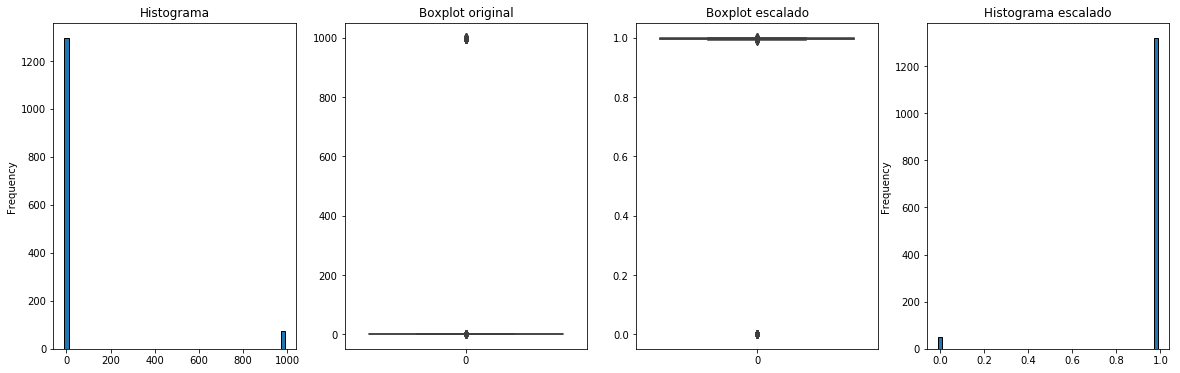

In [67]:
# Se toma la decisión de escalar los datos para que encajen en los valores normales del vino

fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
df['density'].plot.hist(align='left',ec='black', bins=50, ax=axes[0]);
sns.boxplot(data=df['density'],ax=axes[1]);

outacidity=df['density'][df['density']>1].index.values

for x in range(len(outacidity)):
    df.at[outacidity[x],'density']=df.loc[outacidity[x],'density']/1000

sns.boxplot(data=df['density'],ax=axes[2]); 
df['density'].plot.hist(align='left',ec='black', bins=50, ax=axes[3]);

axes[0].set_title("Histograma");
axes[1].set_title("Boxplot original");
axes[2].set_title("Boxplot escalado");
axes[3].set_title("Histograma escalado");

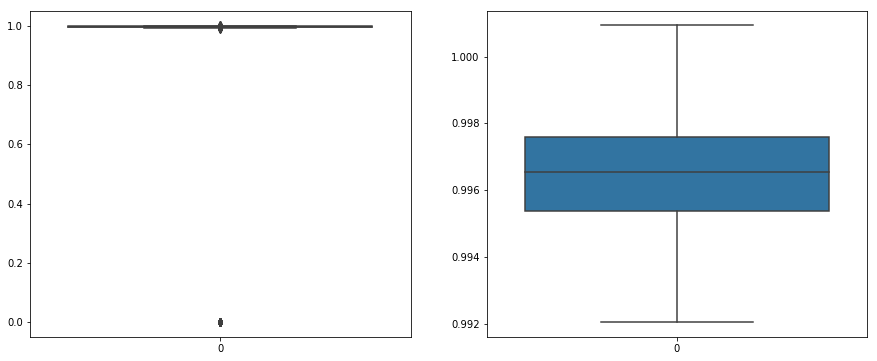

In [68]:
#Ahora que la variable de la densidad está bien escalada, reviso el boxplot para ver si tiene outliers.
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.boxplot(data=df['density'],ax=axes[0]);
Q1=df['density'].quantile(0.25);Q3=df['density'].quantile(0.75);IQR=Q3-Q1;
MIN=Q1-1.5*IQR #Calculos de cuantiles y el minimo 
MAX=Q3+1.5*IQR #Calculos de cuantiles y el máximo 

outden=df['density'][df['density']<0.992].index.values #Almaceno aquellas instancias que tengan valores menores     
upden=df['density'][df['density']>1].index.values#al minimo del boxplot

for x in range(len(outden)):
    df.at[outden[x],'density']=MIN #Reemplazo los valores extraños por el máximo
    
for x in range(len(upden)):
    df.at[upden[x],'density']=MAX #Reemplazo los valores extraños por el máximo
    
    
sns.boxplot(data=df['density'],ax=axes[1]); #Grafico nuevamente el boxplot para comprobar que ya no hay valores atipicos.

## 5.9 pH

Contiene valores normales, no requiere análisis

## 5.10 sulphates

Contiene valores normales, no requiere análisis

## 5.11 alcohol

Contiene valores normales, no requiere análisis

# 6. Reemplazar valores nulos

In [69]:
proof=df.isnull().sum()[df.isnull().sum()>0].index.values

df.isnull().sum()[df.isnull().sum()>0].index.values

#Se llenan los datos faltantes con la mediana

for x in proof:
      df[x].fillna(df[x].median(), inplace = True) 



In [70]:
df.isnull().sum()[df.isnull().sum()>0].index.values

array([], dtype=object)

# 7. Preparación de datos para aplicar algoritmos de regresión

In [71]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
import warnings; warnings.simplefilter('ignore')

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']



x = df[features]
y = df['quality']



## 8.1 Modelos de Regresión

In [72]:
import warnings; warnings.simplefilter('ignore')
test_size = .30
seedNo = 42

x_train,x_test,y_train,Y_test = train_test_split(x,y,test_size = test_size, random_state = seedNo)


# Choose algorithm and train
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


mymodel = []
mymodel.append(('Regr. Lineal', linear_model.LinearRegression()))
mymodel.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
mymodel.append(('RandomForestRegressor', RandomForestRegressor()))
mymodel.append(('SVR', SVR()))
mymodel.append(('MLPRegressor', MLPRegressor()))



for algoname, algorithm in mymodel:  
    
    algorithm.fit(x_train,y_train)
    pred = algorithm.predict(X_test)
    Eval_result=r2_score(Y_test, pred)
    Ev=mean_squared_error(Y_test, pred)
    
    print("Modelo y R2 || MSE:", algoname, 100*Eval_result,"%","||||", "MSE:",Ev)

Modelo y R2 || MSE: Regr. Lineal 38.30475669519288 % |||| MSE: 0.42478596313122086
Modelo y R2 || MSE: DecisionTreeRegressor -17.321548329406934 % |||| MSE: 0.8077858880778589
Modelo y R2 || MSE: RandomForestRegressor 40.04586177841212 % |||| MSE: 0.41279805352798044
Modelo y R2 || MSE: SVR 19.998965324005656 % |||| MSE: 0.5508255538995268
Modelo y R2 || MSE: MLPRegressor 31.899646356030832 % |||| MSE: 0.4688866233869961


## 8.2 Evaluación con Cross Validation

In [83]:
import warnings; warnings.simplefilter('ignore')

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

x = df[features]
y = df['quality']
seedNo = 42

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


mymodel = []
mymodel.append(('Regr. Lineal', linear_model.LinearRegression()))
mymodel.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
mymodel.append(('RandomForestRegressor', RandomForestRegressor()))
mymodel.append(('SVR', SVR()))
mymodel.append(('MLPRegressor', MLPRegressor()))



for algoname, algorithm in mymodel:  
    
    algorithm.fit(x,y)
    kfoldFn = KFold(n_splits = 11, random_state = seedNo)
    Eval_result = cross_val_score(algorithm, x, y, cv = kfoldFn, scoring = 'mean_squared_error')
    Eval_result2 = cross_val_score(algorithm, x, y, cv = kfoldFn, scoring = 'r2')
    Ev=np.mean((Eval_result2))
    Eval_result=np.mean(np.sqrt(-Eval_result))
  
    print("Modelo y MSE:", algoname, 100*Eval_result,"%")
    print("Modelo y R2:", algoname, 100*Ev,"%")

Modelo y MSE: Regr. Lineal 66.47831081607283 %
Modelo y R2: Regr. Lineal 26.96091262276987 %
Modelo y MSE: DecisionTreeRegressor 89.26074094863009 %
Modelo y R2: DecisionTreeRegressor -34.811463266697224 %
Modelo y MSE: RandomForestRegressor 68.2435277686735 %
Modelo y R2: RandomForestRegressor 23.64599549219327 %
Modelo y MSE: SVR 75.38110199079017 %
Modelo y R2: SVR 7.1115301403156375 %
Modelo y MSE: MLPRegressor 84.71355069190784 %
Modelo y R2: MLPRegressor -6.589930363454388 %


# 9. Preparación de datos para aplicar algoritmos de clasificación

In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

reviews = []

for i in df['quality']:
    if i >= 0 and i <= 2:
        reviews.append('1')  ## malo
    elif i >= 3 and i <= 4:
        reviews.append('2')  ## regular
    elif i >= 5 and i <= 6:  
        reviews.append('3')  ## medio
    elif i >= 7 and i <= 8:
        reviews.append('4')  ## alto
    elif i >= 9:
        reviews.append('5')  ## excelente
        
"""

for i in df['quality']:
    if i >= 0 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
"""

df['reviews'] = reviews

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

xx = df[features]
y = df['reviews']



ScaleFn = MinMaxScaler()
xx = ScaleFn.fit_transform(xx)


#sc = StandardScaler()
#xx = sc.fit_transform(xx)

## 9.1 Modelos de clasificación

In [75]:
test_size = .30
seedNo = 42

x_train,X_test,y_train,Y_test = train_test_split(xx,y,test_size = test_size, random_state = seedNo)


# Choose algorithm and train
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

mymodel = []
mymodel.append(('LogReg', LogisticRegression()))
mymodel.append(('SVM', SVC()))
mymodel.append(('DeciTree', DecisionTreeClassifier()))
mymodel.append(('RandForest', RandomForestClassifier()))
mymodel.append(('KNN', KNeighborsClassifier()))
mymodel.append(('NaiveBayes', GaussianNB()))
mymodel.append(('Neuronal', MLPClassifier()))



cm=[]
for algoname, algorithm in mymodel:    
    
    
    algorithm.fit(x_train,y_train)
    pred = algorithm.predict(X_test)
    
    Eval_result=accuracy_score(Y_test, pred)
  
    print("Modelo y precisión:", algoname, 100*Eval_result,"%")
    print("")
    print(classification_report(Y_test, pred))
    print("--------------------------------------------------------------")
    cmtemp=confusion_matrix(Y_test, pred)
    cm.append(cmtemp / cmtemp.astype(np.float).sum(axis=1,keepdims=True))
    

Modelo y precisión: LogReg 81.99513381995133 %

             precision    recall  f1-score   support

          2       0.00      0.00      0.00        11
          3       0.83      0.99      0.90       335
          4       0.60      0.09      0.16        65

avg / total       0.77      0.82      0.76       411

--------------------------------------------------------------
Modelo y precisión: SVM 81.50851581508516 %

             precision    recall  f1-score   support

          2       0.00      0.00      0.00        11
          3       0.82      1.00      0.90       335
          4       0.00      0.00      0.00        65

avg / total       0.66      0.82      0.73       411

--------------------------------------------------------------
Modelo y precisión: DeciTree 79.56204379562044 %

             precision    recall  f1-score   support

          2       0.19      0.36      0.25        11
          3       0.89      0.87      0.88       335
          4       0.52      0.51   

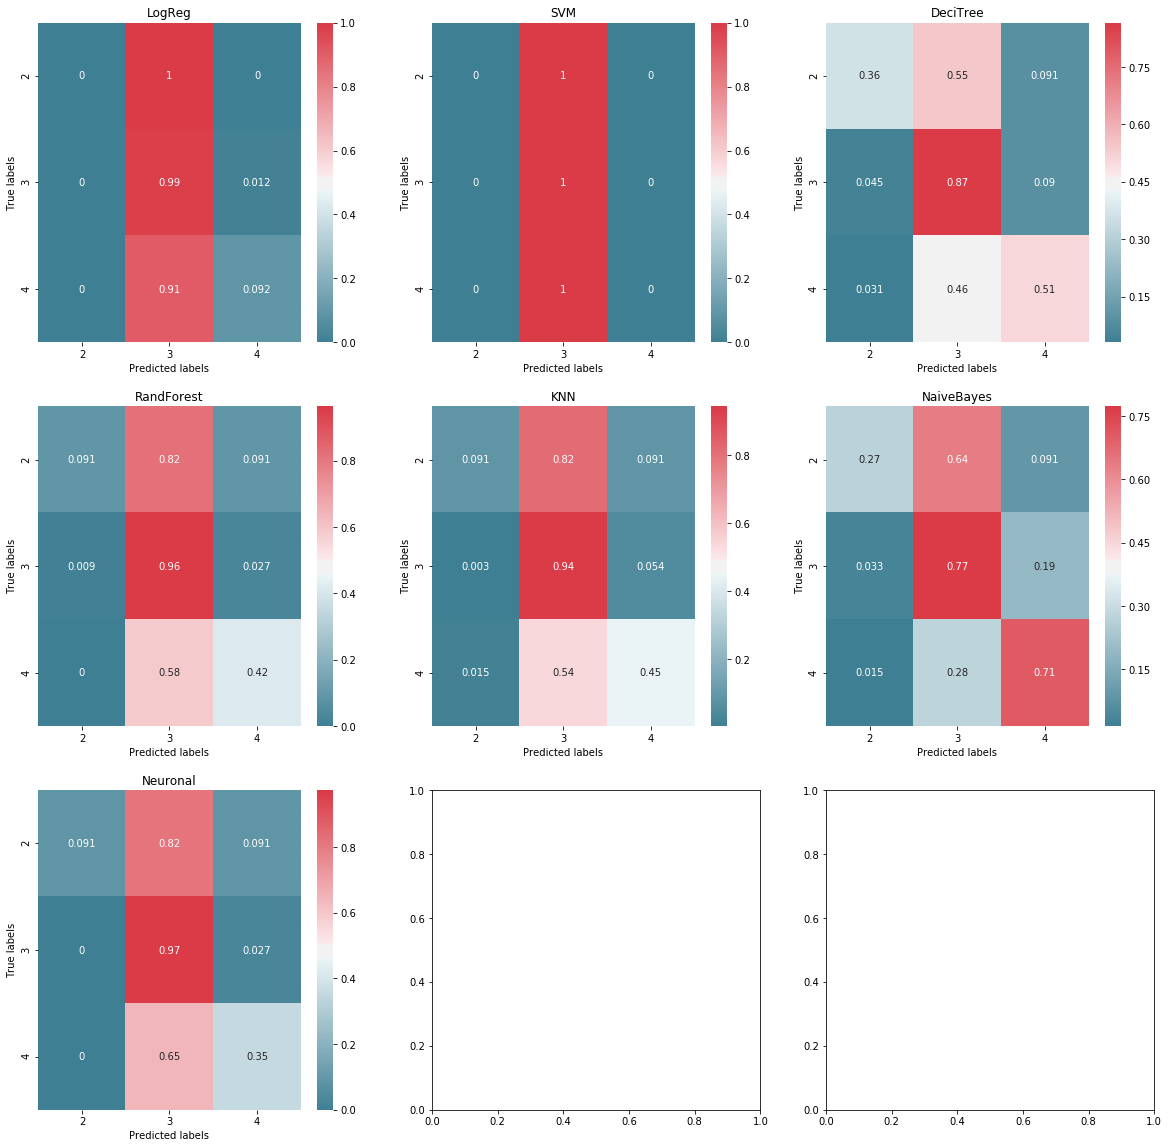

In [76]:
labels=['2', '3','4']
cmap=sns.diverging_palette(220,10,as_cmap=True)
fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(20,20));


contador=0;
for x in range(3):
    for y in range(3):
        try:
            sns.heatmap(cm[contador], annot=True, ax=axes[x,y], cmap=cmap); #annot=True to annotate cells
            # labels, title and ticks
            axes[x,y].set_xlabel('Predicted labels');axes[x,y].set_ylabel('True labels'); 
            axes[x,y].set_title(All_model_name[contador]); 
            axes[x,y].xaxis.set_ticklabels(labels); axes[x,y].yaxis.set_ticklabels(labels);
            contador+=1
            if contador==9: break
        except: pass

## 9.2 Evaluación con  Cross Validation

In [77]:
seedNo = 42
y = df['reviews']

# Choose algorithm and train
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

mymodel = []
mymodel.append(('LogReg', LogisticRegression()))
mymodel.append(('SVM', SVC()))
mymodel.append(('DeciTree', DecisionTreeClassifier()))
mymodel.append(('RandForest', RandomForestClassifier()))
mymodel.append(('KNN', KNeighborsClassifier()))
mymodel.append(('NaiveBayes', GaussianNB()))
mymodel.append(('Neuronal', MLPClassifier()))



for algoname, algorithm in mymodel:    
    kfoldFn = KFold(n_splits = 11, random_state = seedNo)
    Eval_result = cross_val_score(algorithm, xx, y, cv = kfoldFn, scoring = 'accuracy')  

    print("Modelo y precisión:", algoname, 100*Eval_result.mean(),"%")
    

Modelo y precisión: LogReg 82.46099706744869 %
Modelo y precisión: SVM 82.02052785923753 %
Modelo y precisión: DeciTree 73.47390029325513 %
Modelo y precisión: RandForest 82.67859237536658 %
Modelo y precisión: KNN 82.09266862170087 %
Modelo y precisión: NaiveBayes 76.98475073313783 %
Modelo y precisión: Neuronal 83.41407624633432 %


# 10. Hyperparameter Tunning

## 10.1 KNeighborsClassifier

In [78]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()

k_range=range(1,60)
param_grid = dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=40,scoring='accuracy')
grid.fit(xx,y)


GridSearchCV(cv=40, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 60)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [79]:
import warnings; warnings.simplefilter('ignore')
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

Text(0,0.5,'Cross-Validated Accuracy')

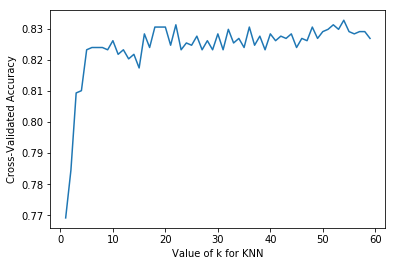

In [80]:
plt.plot(k_range,grid_mean_scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Cross-Validated Accuracy")

In [81]:
print(grid.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=54, p=2,
           weights='uniform')


In [82]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=54, p=2,
           weights='uniform')
scores = cross_val_score(knn, xx, y, cv = 40, scoring = 'accuracy')

print(scores.mean()*100)

83.31100925218576


# 11. Conclusiones

- En general, se observa que los algoritmos de regresión, tuvieron un desempeño muy bajo con respecto a los de clasificación.
  Esto puede pasar porque para los algoritmos de clasificación se hizo una transformación de la variable de salida, dejando un rango de clasifiación más extenso, por tanto es enos probable equivocarse
  

- El mejor algoritmo en regresión fue el random forest y seguidamente la regresión lineal.


- El mejor algoritmo en clasificación fueron las redes neuronales, sin embargo, la clasificación general estuvo muy cercana


- En la evaluación con cross validation, en general se reducen las calificaciones, debido a que la evaluación es mucho más rigurosa cuando se aplica este método, por tanto los resultados son más confiables.